# Customer Churn

In [191]:
# Importing libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import learning_curve

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Data Understanding

In [192]:
df = pd.read_csv('telecom_churn.csv')

df.head(5)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [193]:
# Looking dataset before removing duplicates
df.shape

(3333, 11)

In [194]:
# Looking dataset after removing duplicates
df.drop_duplicates(inplace = True)

df.shape

(3333, 11)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 312.5 KB


In [196]:
df.describe(include = 'all')

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [197]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [198]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [199]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

## Data Visualization

Text(0.5, 1.0, 'Churn Distribution')

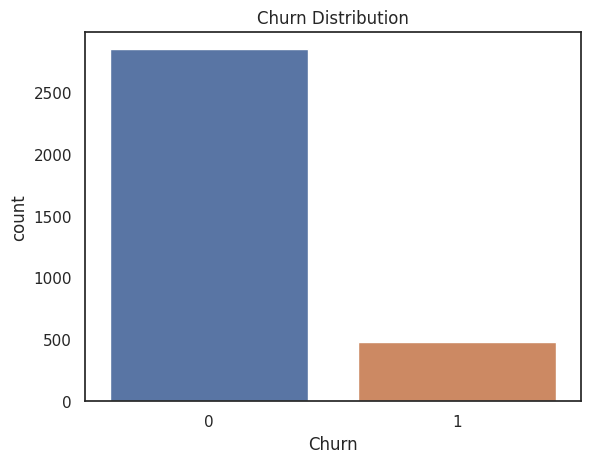

In [200]:
# Churn Plot

sns.countplot(x = 'Churn', data = df)

plt.title('Churn Distribution')


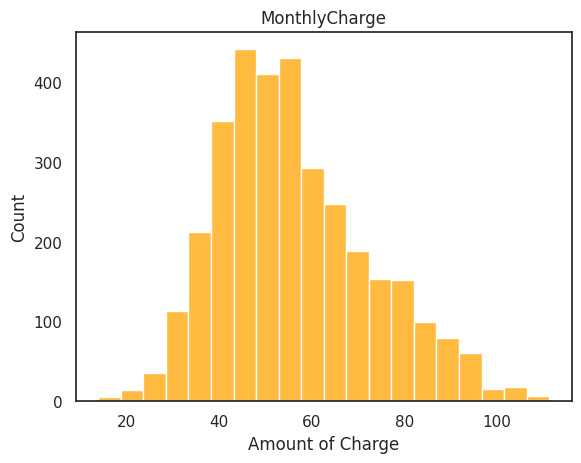

In [201]:
# MonthlyCharge Distribution
sns.histplot(df.MonthlyCharge,bins=20, kde=False,color='orange')

plt.title('MonthlyCharge')

plt.xlabel('Amount of Charge')
plt.ylabel('Count')

plt.show()

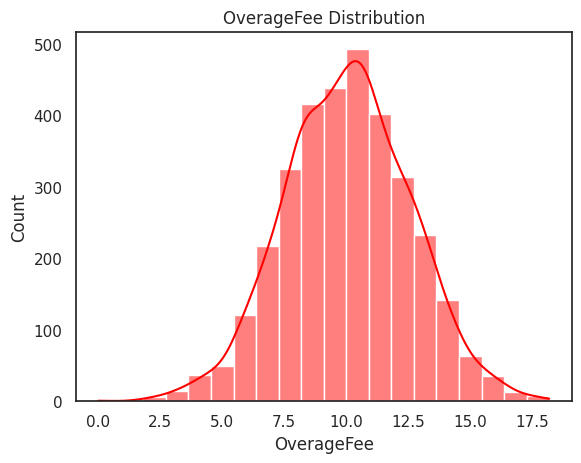

In [202]:
# OverageFee Distribution
sns.histplot(df.OverageFee,
             bins=20,
             kde=True,
             color='red')

plt.title('OverageFee Distribution')

plt.xlabel('OverageFee')
plt.ylabel('Count')

plt.show()

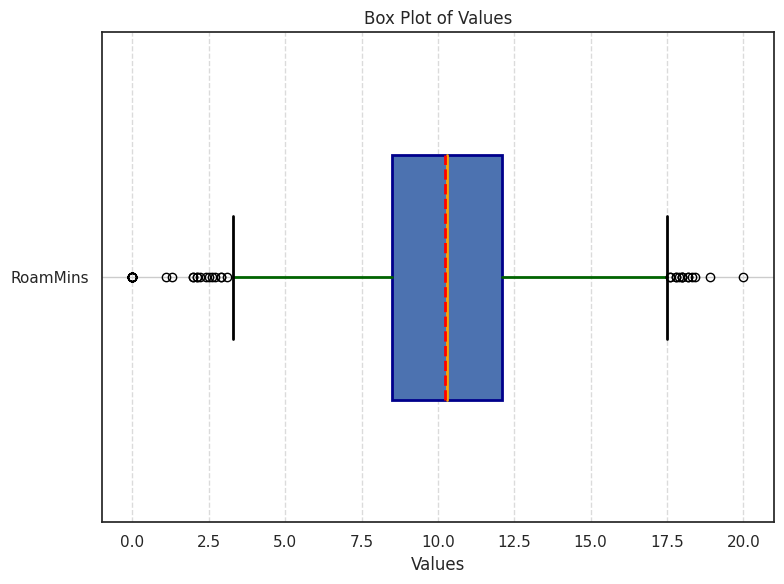

In [203]:
# Create a box plot for a single column
plt.figure(figsize=(8, 6))
boxprops = dict(linewidth=2, color='darkblue')
medianprops = dict(linewidth=2, color='orange')
capprops = dict(linewidth=2, color='black')
whiskerprops = dict(linewidth=2, color='darkgreen')

boxplot = df.boxplot(
    column='RoamMins',
    vert=False,  # Horizontal box plot
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    capprops=capprops,
    whiskerprops=whiskerprops,
    widths=0.5,
    showmeans=True,
    meanline=True,
    meanprops=dict(linewidth=2, color='red')
)

# Customizing the plot
plt.title('Box Plot of Values')
plt.xlabel('Values')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

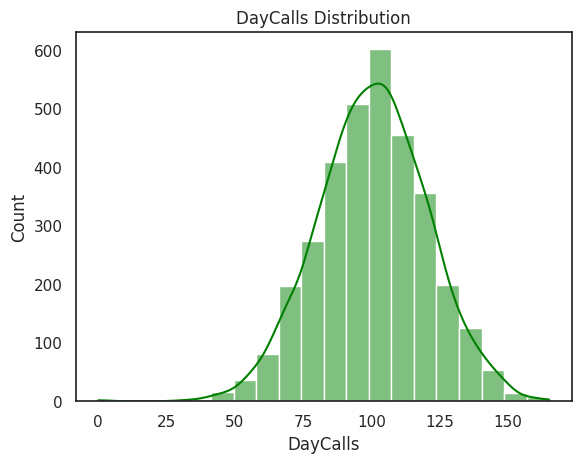

In [204]:
# DayCalls Distribution
sns.histplot(df.DayCalls,
             bins=20,
             kde=True,
             color='green')

plt.title('DayCalls Distribution')

plt.xlabel('DayCalls')
plt.ylabel('Count')

plt.show()

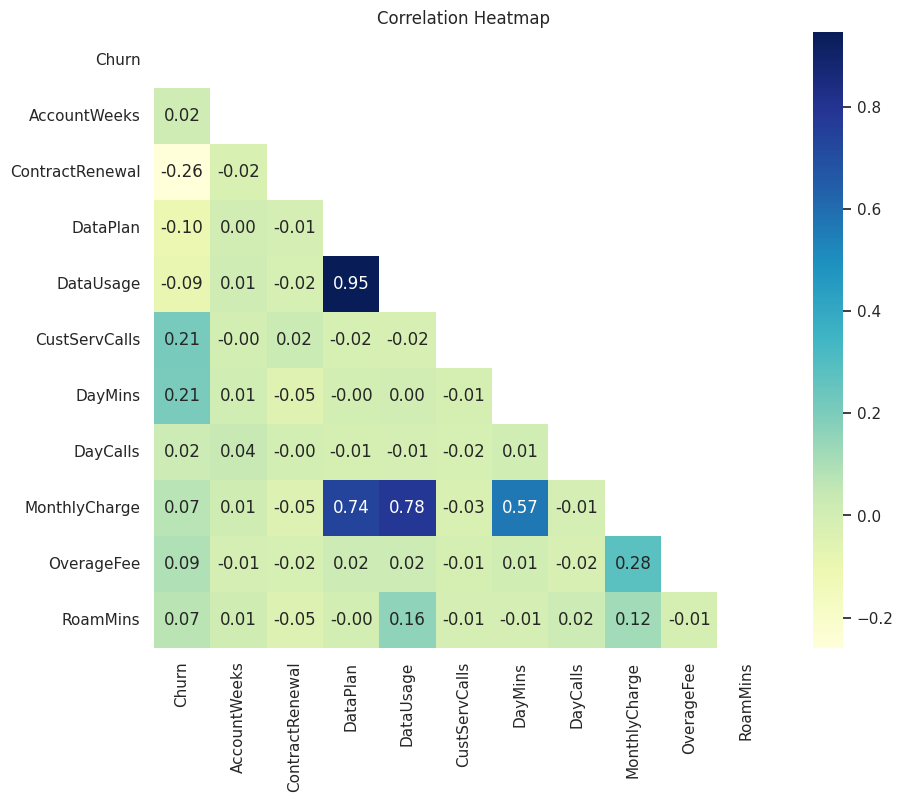

In [205]:
# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(df.corr()))

# Set up the heatmap
plt.figure(figsize=(10, 8))
sns.set(style="white")  # Set the style of the plot

# Plot a triangular correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=mask, fmt=".2f")

# Add a title to the heatmap
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()


## Data Modeling

In [206]:
df = df[['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins', 'Churn']]

df.head(5)

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,0
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,0
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,0
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,0


In [207]:
# Separate Target Variable and Predictor Variables
TargetVariable='Churn'
Predictors=['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins']

X = df[Predictors].values
y = df[TargetVariable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [208]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, (0,3,5,6,7,8,9)] = sc.fit_transform(X_train[:, (0,3,5,6,7,8,9)])
X_test[:, (0,3,5,6,7,8,9)] = sc.transform(X_test[:, (0,3,5,6,7,8,9)])

In [209]:
print(X_train)

[[-0.5119373   1.          0.         ...  0.19091951  1.16613387
  -0.37368209]
 [-0.93900218  1.          0.         ... -1.66817285 -2.63995108
  -0.12283524]
 [ 0.39243537  1.          1.         ...  1.17261844 -0.98513154
  -0.44535262]
 ...
 [-0.86363779  1.          0.         ... -0.96871236  1.20159428
  -0.37368209]
 [ 1.72387293  1.          0.         ... -0.62511773 -0.50838591
  -0.12283524]
 [-1.61728169  1.          1.         ... -0.98098359 -1.41459661
  -0.58869367]]


In [210]:
print(X_test)

[[ 0.31707098  1.          0.         ... -0.07291208  2.55303024
   1.16723428]
 [-0.83851632  1.          0.         ... -1.1159672   0.32296391
   0.91638743]
 [-0.05975096  1.          0.         ... -2.5885156  -0.81570954
  -1.23372843]
 ...
 [ 0.09097782  1.          0.         ... -1.23867956 -0.83540977
   0.09217635]
 [-0.91388071  1.          0.         ... -0.0115559  -0.66992782
  -0.08699997]
 [ 0.69389293  1.          0.         ... -1.05461101  0.88639056
  -1.37706949]]


### XGBoost (Overfitted Model)

In [211]:
# Define the pipeline
resampling = SMOTE(sampling_strategy='minority') # resampling strategy is set to 'minority' to resample the minority class
tomek = TomekLinks(sampling_strategy='majority') # sampling strategy is set to 'majority' to undersample the majority class
scaler = MinMaxScaler()
model = XGBClassifier(scale_pos_weight=sum(y==0)/sum(y==1), # adjust class weights due to class imbalance
                      eval_metric='logloss', # use logloss to evaluate performance
                      use_label_encoder=False) # to avoid warning message
pipeline = Pipeline([('MinMaxScale', scaler), ('SMOTE', resampling), ('TomekLinks', tomek), ('Model', model)])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       857
           1       0.80      0.69      0.74       143

    accuracy                           0.93      1000
   macro avg       0.87  

<Axes: >

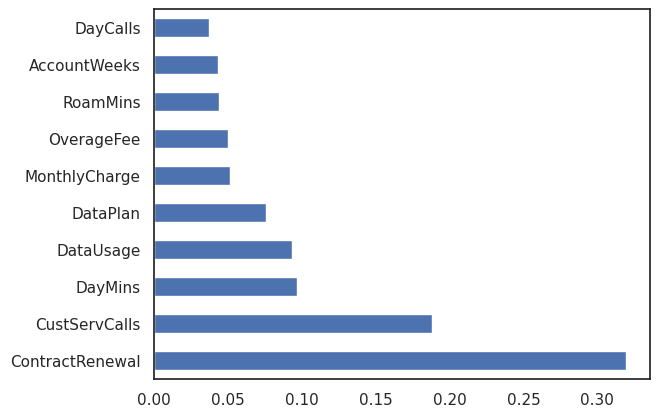

In [212]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
model = XGBClassifier(
    scale_pos_weight=sum(y_train==0)/sum(y_train==1), # adjust class weights due to class imbalance
    eval_metric='logloss', # use logloss to evaluate performance
    use_label_encoder=False # to avoid warning message
)

# Printing all the parameters of XGBoost
print(model)

# Creating the model on Training Data
XGB=model.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [213]:
# Define the model with default hyperparameters
model = XGBClassifier(
    scale_pos_weight=sum(y_train==0)/sum(y_train==1), # adjust class weights due to class imbalance
    eval_metric='logloss', # use logloss to evaluate performance
    use_label_encoder=False # to avoid warning message
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)[:,1]

In [214]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       857
           1       0.80      0.69      0.74       143

    accuracy                           0.93      1000
   macro avg       0.87      0.83      0.85      1000
weighted avg       0.93      0.93      0.93      1000



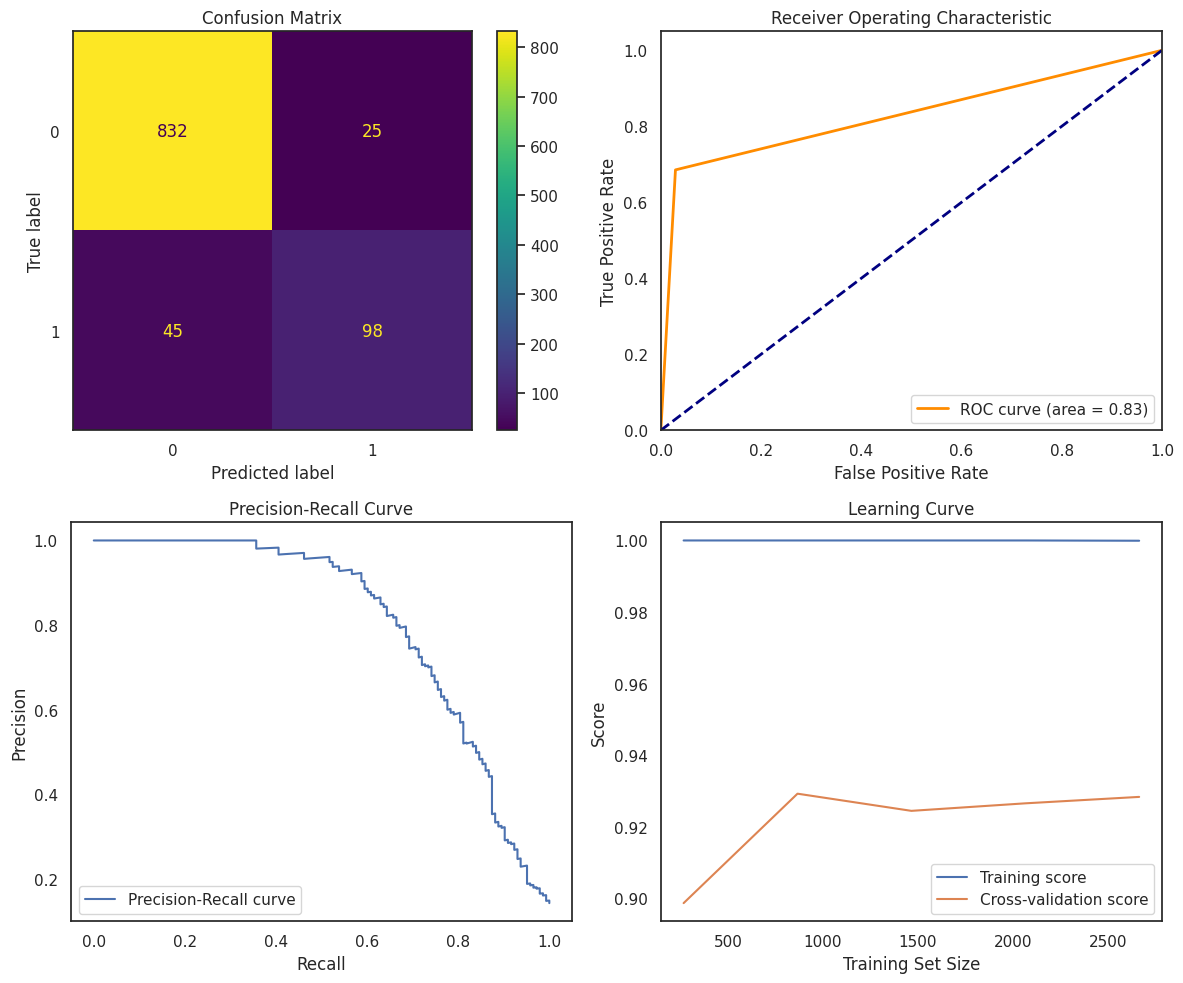

In [215]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(ax=axes[0, 0])
axes[0, 0].set_title("Confusion Matrix")

# ROC Curve
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)
axes[0, 1].plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('Receiver Operating Characteristic')
axes[0, 1].legend(loc="lower right")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
axes[1, 0].plot(recall, precision, label='Precision-Recall curve')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision-Recall Curve')
axes[1, 0].legend(loc="lower left")

# Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(model, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
axes[1, 1].plot(train_sizes, train_scores.mean(axis=1), label='Training score')
axes[1, 1].plot(train_sizes, valid_scores.mean(axis=1), label='Cross-validation score')
axes[1, 1].set_xlabel('Training Set Size')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Learning Curve')
axes[1, 1].legend(loc="lower right")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [216]:
from sklearn.metrics import accuracy_score

# Evaluate on training data
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate on test data
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
else:
    print("The model is likely performing reasonably.")

Training accuracy: 1.0
Test accuracy: 0.93
The model might be overfitting.


### Logistic Regression

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       857
           1       0.60      0.20      0.29       143

    accuracy                           0.87      1000
   macro avg       0.74      0.59      0.61      1000
weighted avg       0.84      0.87      0.84      1000

[[838  19]
 [115  28]]
Accuracy of the model on Testing Sample Data: 0.84

Accuracy values for 10-fold Cross Validation:
 [0.82215866 0.85179889 0.83475529 0.82155889 0.82955373 0.83215295
 0.8203895  0.82787327 0.80926471 0.83392028]

Final Average Accuracy of the model: 0.83


<Axes: >

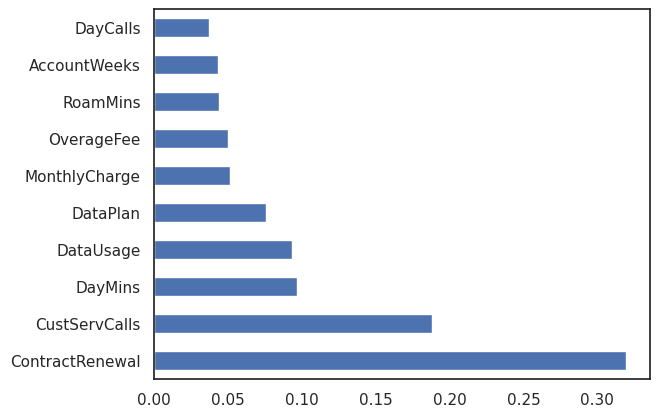

In [217]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [218]:
# Make predictions on the test set
y_pred = LOG.predict(X_test)
y_score = LOG.predict_proba(X_test)[:,1]

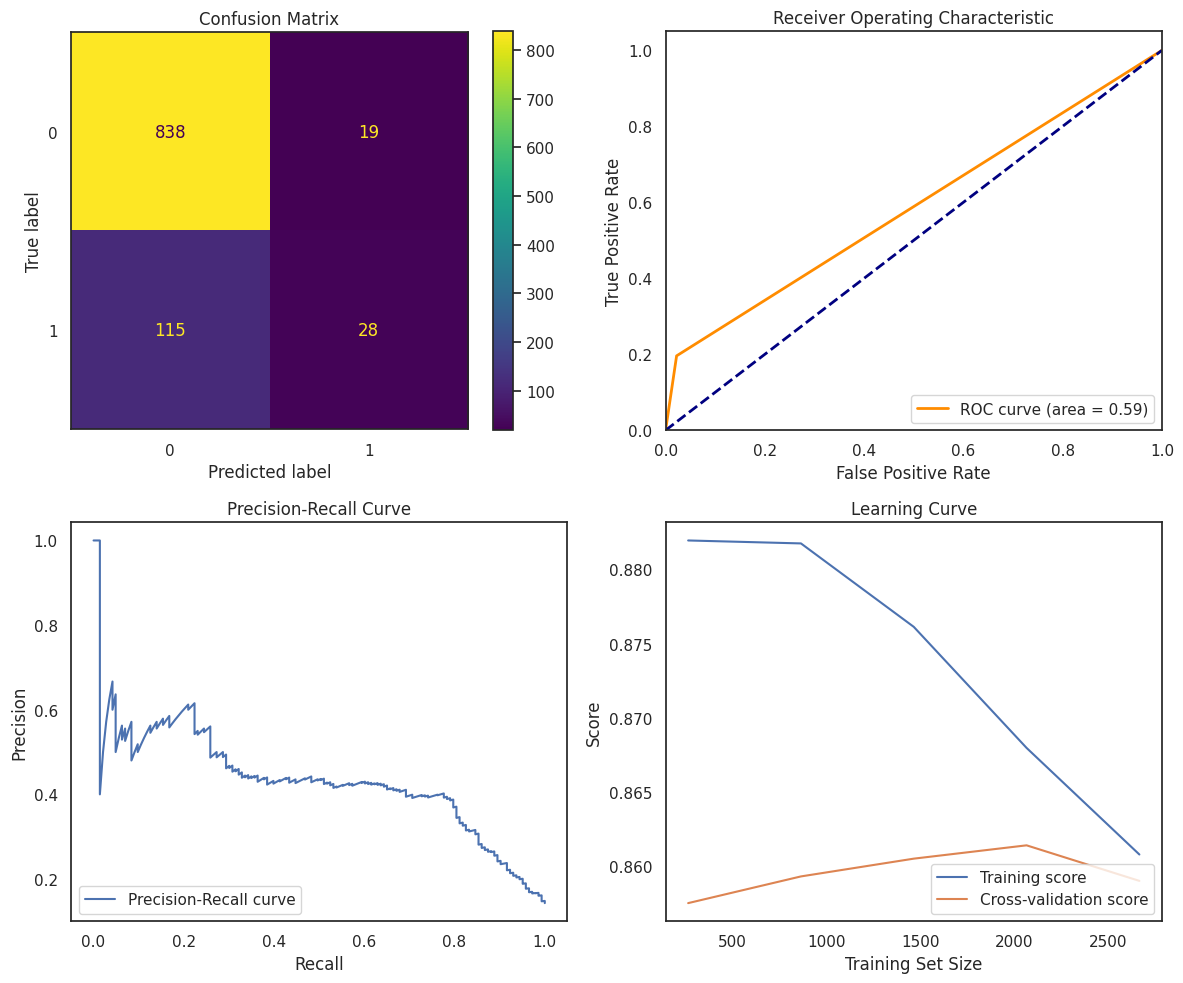

In [219]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=LOG.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LOG.classes_)
disp.plot(ax=axes[0, 0])
axes[0, 0].set_title("Confusion Matrix")

# ROC Curve
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)
axes[0, 1].plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('Receiver Operating Characteristic')
axes[0, 1].legend(loc="lower right")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
axes[1, 0].plot(recall, precision, label='Precision-Recall curve')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision-Recall Curve')
axes[1, 0].legend(loc="lower left")

# Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(LOG, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
axes[1, 1].plot(train_sizes, train_scores.mean(axis=1), label='Training score')
axes[1, 1].plot(train_sizes, valid_scores.mean(axis=1), label='Cross-validation score')
axes[1, 1].set_xlabel('Training Set Size')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Learning Curve')
axes[1, 1].legend(loc="lower right")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [220]:
# Evaluate on training data
train_predictions = LOG.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate on test data
test_predictions = LOG.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
else:
    print("The model is likely performing reasonably.")

Training accuracy: 0.8585512216030862
Test accuracy: 0.866
The model is likely performing reasonably.


### Decision Trees

DecisionTreeClassifier(criterion='entropy', max_depth=2)
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       857
           1       0.64      0.54      0.58       143

    accuracy                           0.89      1000
   macro avg       0.78      0.74      0.76      1000
weighted avg       0.88      0.89      0.89      1000

[[813  44]
 [ 66  77]]
Accuracy of the model on Testing Sample Data: 0.89

Accuracy values for 10-fold Cross Validation:
 [0.87447937 0.86433732 0.87562863 0.86415165 0.85797545 0.86373785
 0.88631948 0.81670019 0.87891131 0.86525876]

Final Average Accuracy of the model: 0.86


<Axes: >

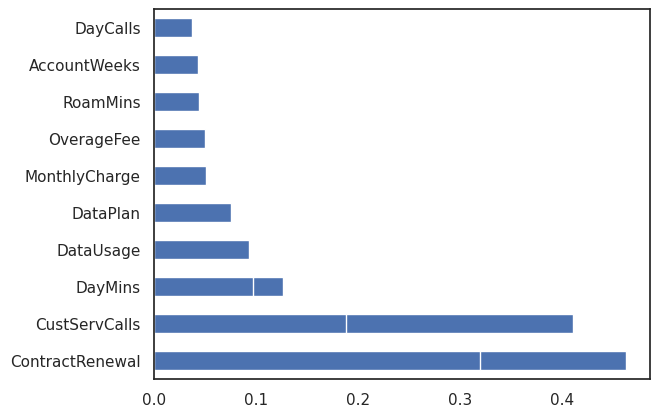

In [221]:
#Decision Trees
from sklearn import tree

#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [222]:
# Make predictions on the test set
y_pred = DTree.predict(X_test)
y_score = DTree.predict_proba(X_test)[:,1]

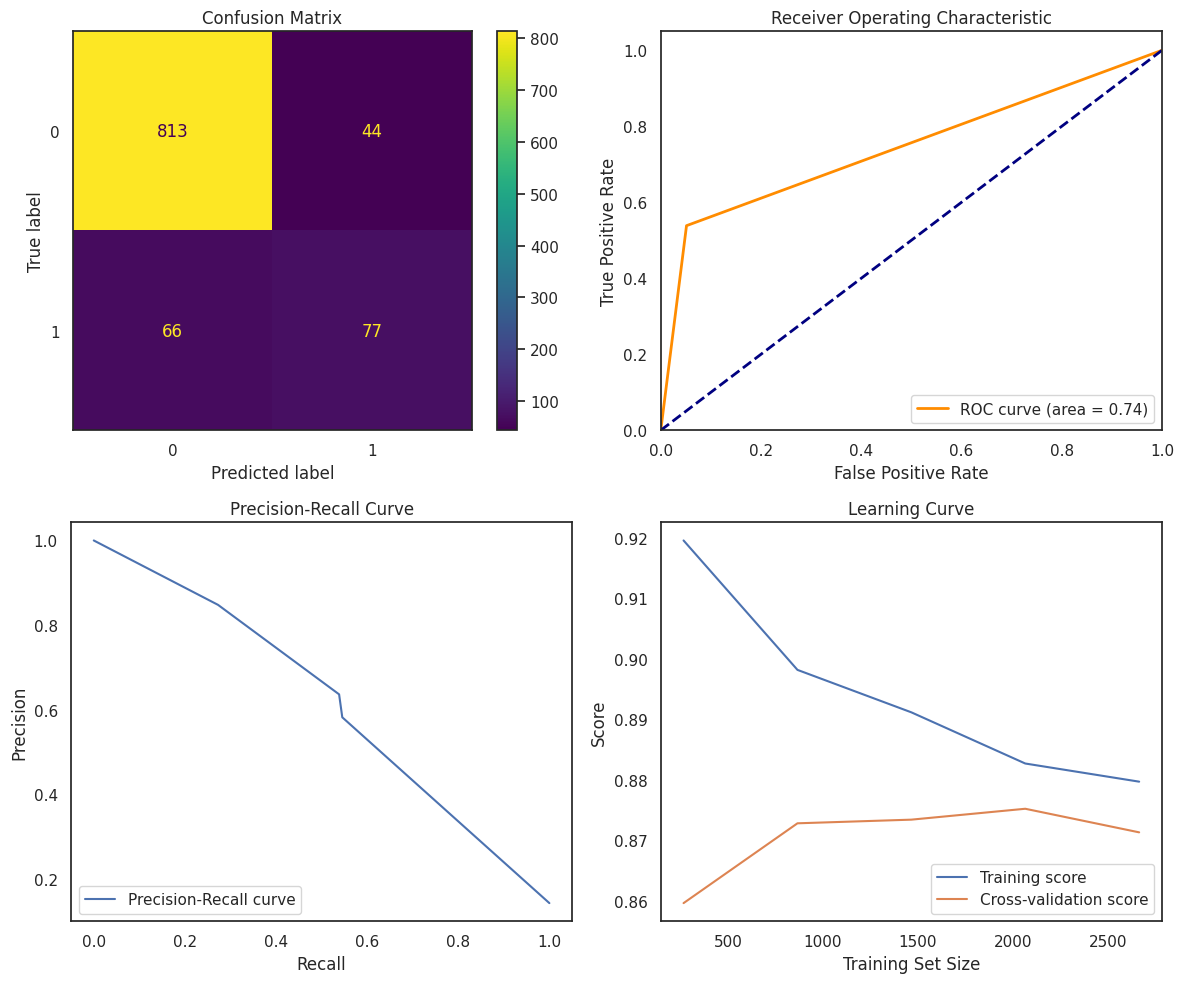

In [223]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=DTree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DTree.classes_)
disp.plot(ax=axes[0, 0])
axes[0, 0].set_title("Confusion Matrix")

# ROC Curve
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)
axes[0, 1].plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('Receiver Operating Characteristic')
axes[0, 1].legend(loc="lower right")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
axes[1, 0].plot(recall, precision, label='Precision-Recall curve')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision-Recall Curve')
axes[1, 0].legend(loc="lower left")

# Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(DTree, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
axes[1, 1].plot(train_sizes, train_scores.mean(axis=1), label='Training score')
axes[1, 1].plot(train_sizes, valid_scores.mean(axis=1), label='Cross-validation score')
axes[1, 1].set_xlabel('Training Set Size')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Learning Curve')
axes[1, 1].legend(loc="lower right")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [224]:
# Evaluate on training data
train_predictions = DTree.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate on test data
test_predictions = DTree.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
else:
    print("The model is likely performing reasonably.")

Training accuracy: 0.8774110587226747
Test accuracy: 0.89
The model is likely performing reasonably.


### Random Forest

RandomForestClassifier(max_depth=2)
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       857
           1       1.00      0.01      0.01       143

    accuracy                           0.86      1000
   macro avg       0.93      0.50      0.47      1000
weighted avg       0.88      0.86      0.79      1000

[[857   0]
 [142   1]]
Accuracy of the model on Testing Sample Data: 0.79

Accuracy values for 10-fold Cross Validation:
 [0.78574676 0.8111002  0.82133416 0.78938161 0.78938161 0.78938161
 0.78938161 0.79654444 0.80347607 0.81478554]

Final Average Accuracy of the model: 0.8


<Axes: >

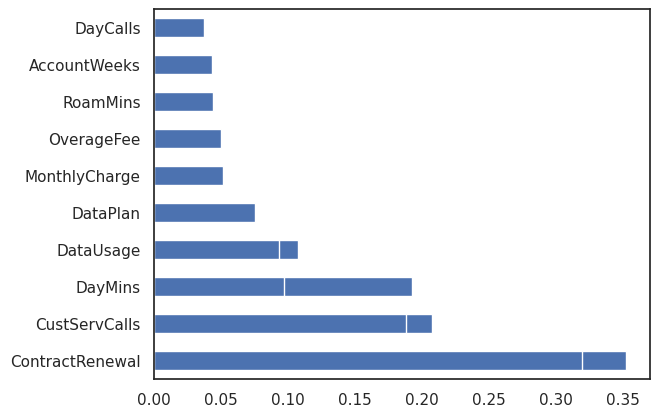

In [225]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, n_estimators=100,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [226]:
# Make predictions on the test set
y_pred = RF.predict(X_test)
y_score = RF.predict_proba(X_test)[:,1]

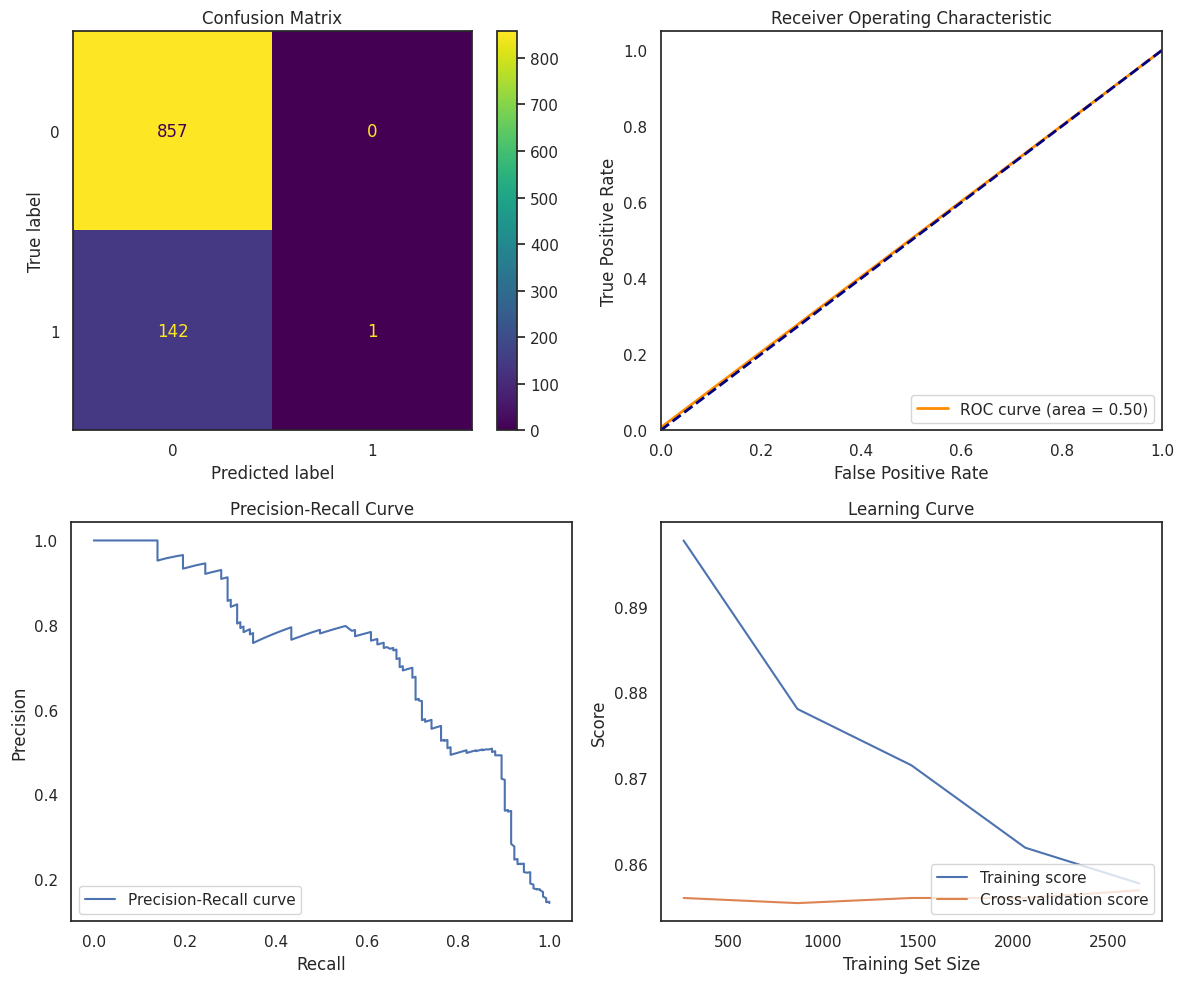

In [227]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(ax=axes[0, 0])
axes[0, 0].set_title("Confusion Matrix")

# ROC Curve
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)
axes[0, 1].plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('Receiver Operating Characteristic')
axes[0, 1].legend(loc="lower right")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
axes[1, 0].plot(recall, precision, label='Precision-Recall curve')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision-Recall Curve')
axes[1, 0].legend(loc="lower left")

# Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(RF, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
axes[1, 1].plot(train_sizes, train_scores.mean(axis=1), label='Training score')
axes[1, 1].plot(train_sizes, valid_scores.mean(axis=1), label='Cross-validation score')
axes[1, 1].set_xlabel('Training Set Size')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Learning Curve')
axes[1, 1].legend(loc="lower right")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [228]:
# Evaluate on training data
train_predictions = RF.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate on test data
test_predictions = RF.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
else:
    print("The model is likely performing reasonably.")

Training accuracy: 0.8594084869267038
Test accuracy: 0.858
The model might be overfitting.


### ADABoost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=500)
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       857
           1       0.57      0.09      0.16       143

    accuracy                           0.86      1000
   macro avg       0.72      0.54      0.54      1000
weighted avg       0.82      0.86      0.81      1000

[[847  10]
 [130  13]]
Accuracy of the model on Testing Sample Data: 0.81

Accuracy values for 10-fold Cross Validation:
 [0.80358672 0.81327172 0.82296657 0.8266106  0.80722465 0.79170476
 0.80003657 0.81903031 0.81903031 0.82871233]

Final Average Accuracy of the model: 0.81


<Axes: >

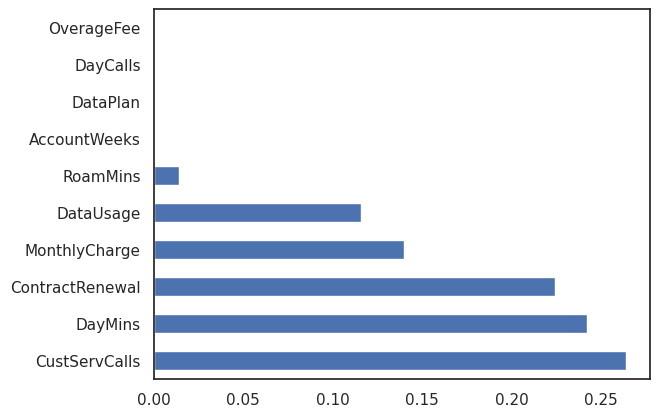

In [229]:
# Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=500, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [230]:
# Make predictions on the test set
y_pred = AB.predict(X_test)
y_score = AB.predict_proba(X_test)[:,1]

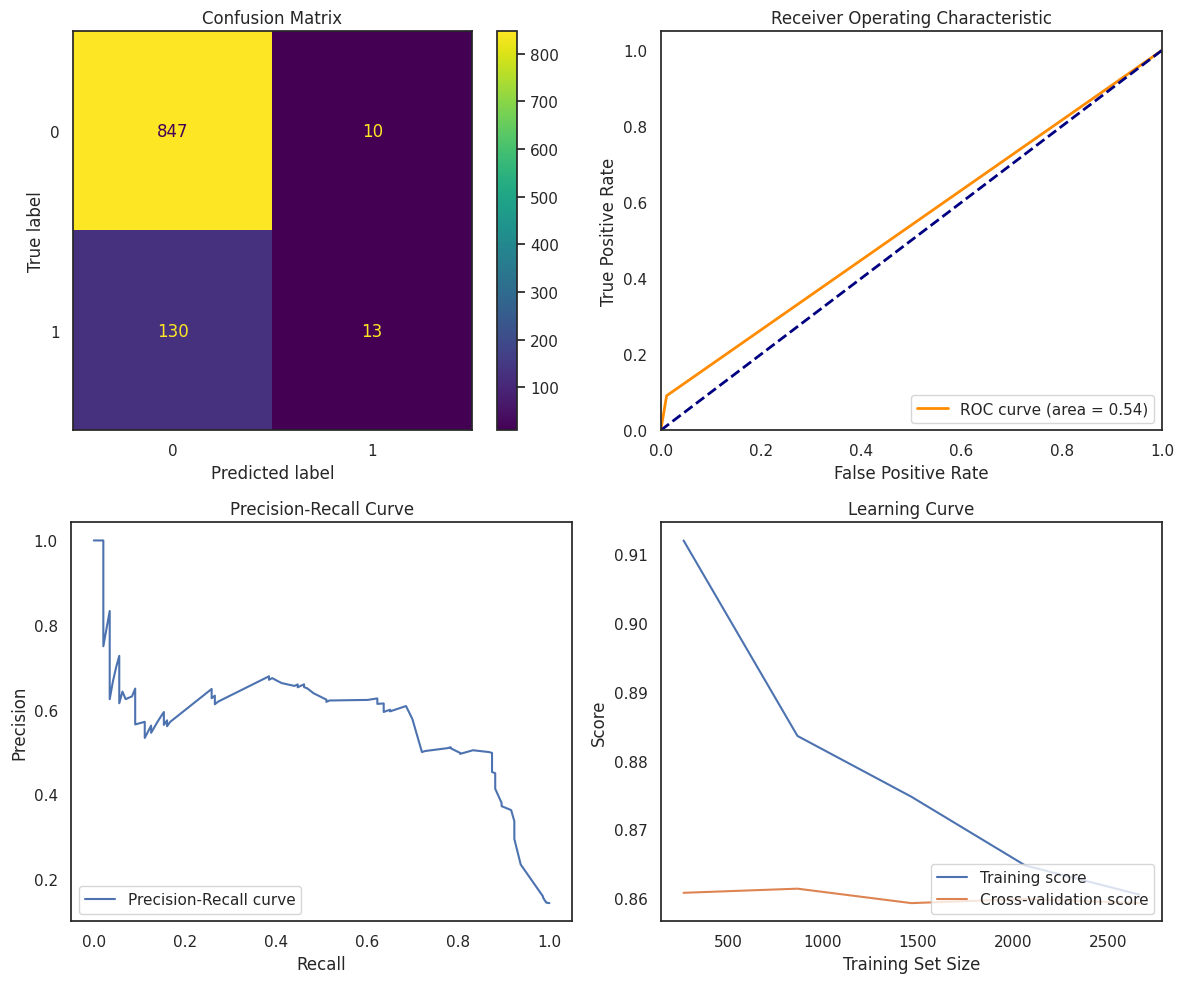

In [231]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=AB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=AB.classes_)
disp.plot(ax=axes[0, 0])
axes[0, 0].set_title("Confusion Matrix")

# ROC Curve
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)
axes[0, 1].plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('Receiver Operating Characteristic')
axes[0, 1].legend(loc="lower right")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
axes[1, 0].plot(recall, precision, label='Precision-Recall curve')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision-Recall Curve')
axes[1, 0].legend(loc="lower left")

# Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(AB, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
axes[1, 1].plot(train_sizes, train_scores.mean(axis=1), label='Training score')
axes[1, 1].plot(train_sizes, valid_scores.mean(axis=1), label='Cross-validation score')
axes[1, 1].set_xlabel('Training Set Size')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Learning Curve')
axes[1, 1].legend(loc="lower right")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [232]:
# Evaluate on training data
train_predictions = AB.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate on test data
test_predictions = AB.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
else:
    print("The model is likely performing reasonably.")

Training accuracy: 0.8606943849121304
Test accuracy: 0.86
The model might be overfitting.


### XGBoost (Normal)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       857
           1       0.92      0.33      0.48       143

    accuracy                           0.90      1000
   macro avg       0.91      

<Axes: >

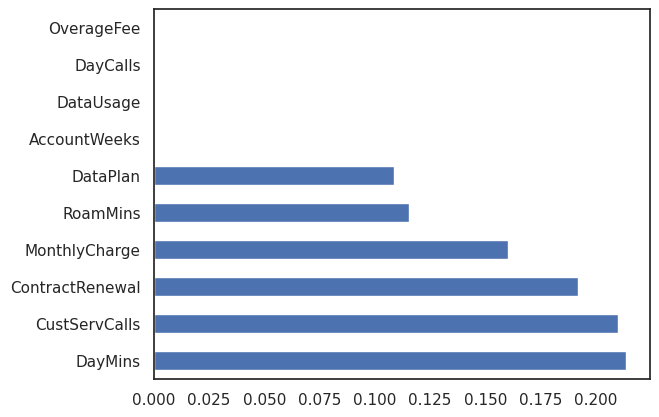

In [233]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=2, learning_rate=0.01, n_estimators=200, objective='binary:logistic', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [234]:
# Make predictions on the test set
y_pred = XGB.predict(X_test)
y_score = XGB.predict_proba(X_test)[:,1]

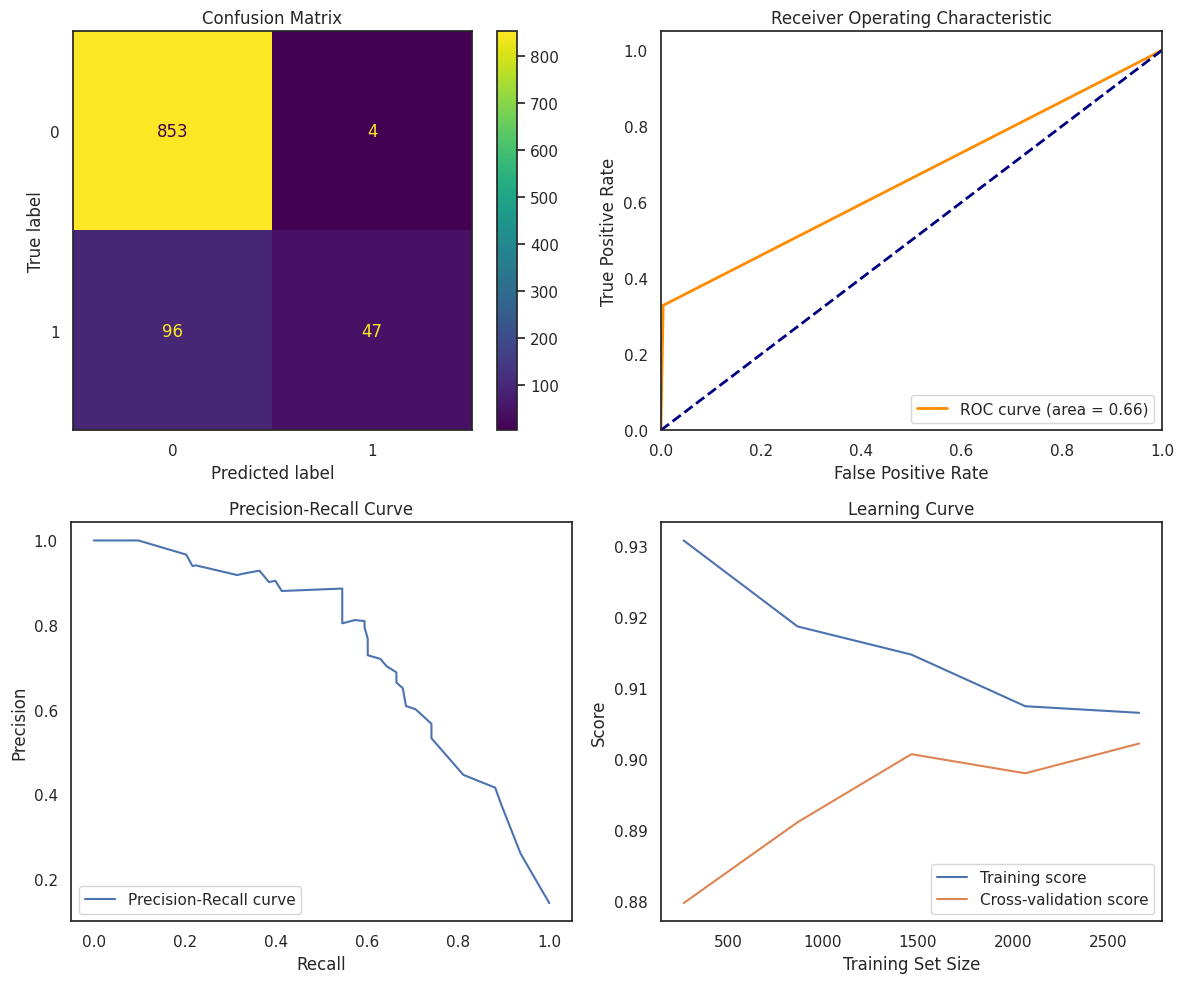

In [235]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=XGB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=XGB.classes_)
disp.plot(ax=axes[0, 0])
axes[0, 0].set_title("Confusion Matrix")

# ROC Curve
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)
axes[0, 1].plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('Receiver Operating Characteristic')
axes[0, 1].legend(loc="lower right")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
axes[1, 0].plot(recall, precision, label='Precision-Recall curve')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision-Recall Curve')
axes[1, 0].legend(loc="lower left")

# Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(XGB, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
axes[1, 1].plot(train_sizes, train_scores.mean(axis=1), label='Training score')
axes[1, 1].plot(train_sizes, valid_scores.mean(axis=1), label='Cross-validation score')
axes[1, 1].set_xlabel('Training Set Size')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Learning Curve')
axes[1, 1].legend(loc="lower right")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [236]:
# Evaluate on training data
train_predictions = XGB.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate on test data
test_predictions = XGB.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
else:
    print("The model is likely performing reasonably.")

Training accuracy: 0.9134162023146164
Test accuracy: 0.9
The model might be overfitting.


### KNN

In [237]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       857
           1       0.77      0.35      0.48       143

    accuracy                           0.89      1000
   macro avg       0.83      0.67      0.71      1000
weighted avg       0.88      0.89      0.87      1000

[[842  15]
 [ 93  50]]
Accuracy of the model on Testing Sample Data: 0.87

Accuracy values for 10-fold Cross Validation:
 [0.83364432 0.81157163 0.8449007  0.79342979 0.83474383 0.86541233
 0.84602712 0.87280501 0.84389457 0.84571657]

Final Average Accuracy of the model: 0.84


In [238]:
# Make predictions on the test set
y_pred = KNN.predict(X_test)
y_score = KNN.predict_proba(X_test)[:,1]

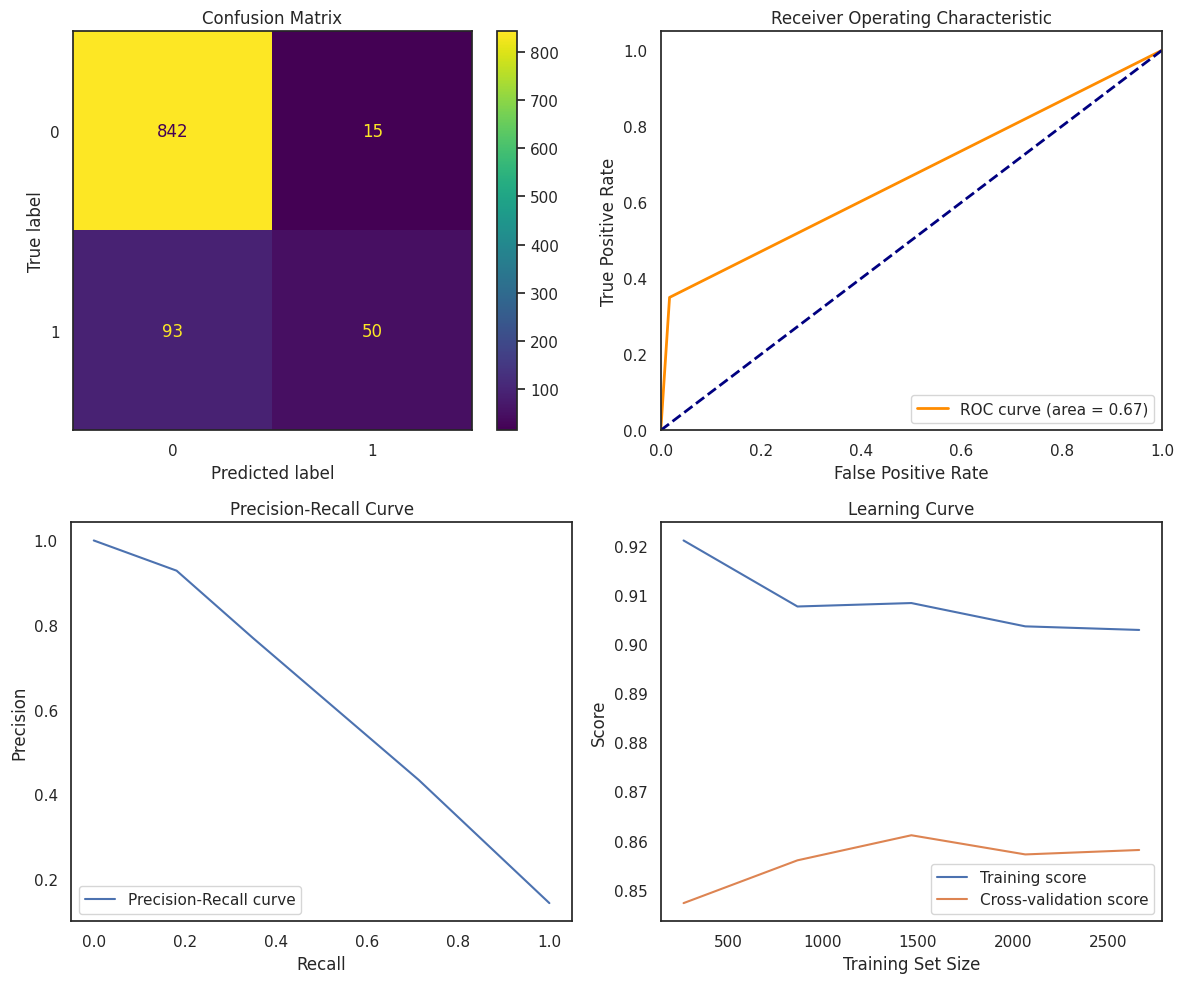

In [239]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=KNN.classes_)
disp.plot(ax=axes[0, 0])
axes[0, 0].set_title("Confusion Matrix")

# ROC Curve
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)
axes[0, 1].plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('Receiver Operating Characteristic')
axes[0, 1].legend(loc="lower right")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
axes[1, 0].plot(recall, precision, label='Precision-Recall curve')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision-Recall Curve')
axes[1, 0].legend(loc="lower left")

# Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(KNN, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
axes[1, 1].plot(train_sizes, train_scores.mean(axis=1), label='Training score')
axes[1, 1].plot(train_sizes, valid_scores.mean(axis=1), label='Cross-validation score')
axes[1, 1].set_xlabel('Training Set Size')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Learning Curve')
axes[1, 1].legend(loc="lower right")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [240]:
# Evaluate on training data
train_predictions = KNN.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate on test data
test_predictions = KNN.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
else:
    print("The model is likely performing reasonably.")

Training accuracy: 0.9288469781397343
Test accuracy: 0.892
The model might be overfitting.


### SVM

In [241]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=3, kernel='rbf', gamma=0.1)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

SVC(C=3, gamma=0.1)
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       857
           1       0.83      0.52      0.64       143

    accuracy                           0.92      1000
   macro avg       0.88      0.75      0.80      1000
weighted avg       0.91      0.92      0.91      1000

[[842  15]
 [ 68  75]]
Accuracy of the model on Testing Sample Data: 0.91

Accuracy values for 10-fold Cross Validation:
 [0.78574676 0.78574676 0.78574676 0.78938161 0.78938161 0.78938161
 0.78938161 0.78938161 0.78938161 0.78938161]

Final Average Accuracy of the model: 0.79


In [242]:
# Evaluate on training data
train_predictions = SVM.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate on test data
test_predictions = SVM.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
else:
    print("The model is likely performing reasonably.")

Training accuracy: 0.9434204886412345
Test accuracy: 0.917
The model might be overfitting.


### Naive Bayes

In [243]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

GaussianNB()
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       857
           1       0.42      0.36      0.39       143

    accuracy                           0.84      1000
   macro avg       0.66      0.64      0.65      1000
weighted avg       0.83      0.84      0.83      1000

[[785  72]
 [ 91  52]]
Accuracy of the model on Testing Sample Data: 0.83

Accuracy values for 10-fold Cross Validation:
 [0.83846931 0.8707066  0.84681396 0.82313568 0.84945012 0.84638542
 0.85030139 0.84638542 0.85322453 0.83327703]

Final Average Accuracy of the model: 0.85


In [244]:
# Make predictions on the test set
y_pred = NB.predict(X_test)
y_score = NB.predict_proba(X_test)[:,1]

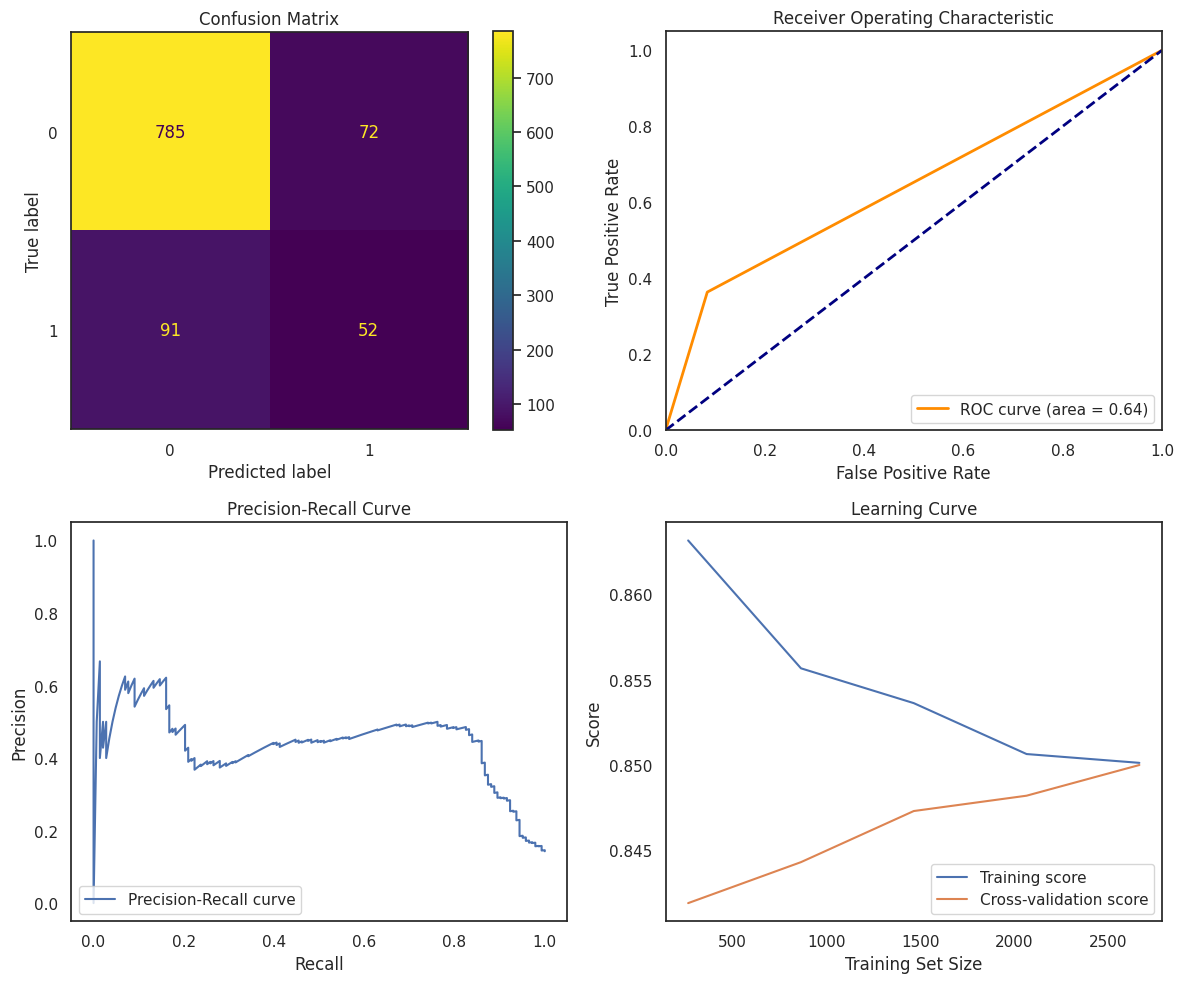

In [245]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=NB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=NB.classes_)
disp.plot(ax=axes[0, 0])
axes[0, 0].set_title("Confusion Matrix")

# ROC Curve
fpr_optimized, tpr_optimized, _ = roc_curve(y_test, y_pred)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)
axes[0, 1].plot(fpr_optimized, tpr_optimized, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('Receiver Operating Characteristic')
axes[0, 1].legend(loc="lower right")

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
axes[1, 0].plot(recall, precision, label='Precision-Recall curve')
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision-Recall Curve')
axes[1, 0].legend(loc="lower left")

# Learning Curve
train_sizes, train_scores, valid_scores = learning_curve(NB, X, y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
axes[1, 1].plot(train_sizes, train_scores.mean(axis=1), label='Training score')
axes[1, 1].plot(train_sizes, valid_scores.mean(axis=1), label='Cross-validation score')
axes[1, 1].set_xlabel('Training Set Size')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Learning Curve')
axes[1, 1].legend(loc="lower right")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [246]:
# Evaluate on training data
train_predictions = NB.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Evaluate on test data
test_predictions = NB.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)

if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
else:
    print("The model is likely performing reasonably.")

Training accuracy: 0.853836262323189
Test accuracy: 0.837
The model might be overfitting.


## Model Deployment

In [247]:
print('Accuracy of Linear Regression', LOG.score(X_train, y_train))
print('Accuracy of Decision Trees', DTree.score(X_train, y_train))
print('Accuracy of Random Forest', RF.score(X_train, y_train))
print('Accuracy of ADABoost', AB.score(X_train, y_train))
print('Accuracy of XGBoost', XGB.score(X_train, y_train))
print('Accuracy of overfitted XGBoost', model.score(X_train, y_train))
print('Accuracy of KNN', KNN.score(X_train, y_train))
print('Accuracy of SVM', SVM.score(X_train, y_train))
print('Accuracy of NB', NB.score(X_train, y_train))

Accuracy of Linear Regression 0.8585512216030862
Accuracy of Decision Trees 0.8774110587226747
Accuracy of Random Forest 0.8594084869267038
Accuracy of ADABoost 0.8606943849121304
Accuracy of XGBoost 0.9134162023146164
Accuracy of overfitted XGBoost 1.0
Accuracy of KNN 0.9288469781397343
Accuracy of SVM 0.9434204886412345
Accuracy of NB 0.853836262323189


In [248]:
# Separate Target Variable and Predictor Variables
TargetVariable='Churn'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins']

X=df[Predictors].values
y=df[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler = StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit = PredictorScaler.fit(X[:, (0,3,5,6,7,8,9)])

# Generating the standardized values of X
X=PredictorScalerFit.transform(X[:, (0,3,5,6,7,8,9)])

print(X.shape)
print(y.shape)

(3333, 7)
(3333,)


In [249]:
# choose from different tunable hyper parameters
# XGB Model
from xgboost import XGBClassifier
clf = XGBClassifier(max_depth=2,
                    learning_rate=0.01,
                    n_estimators=200,
                    objective='binary:logistic',
                    booster='gbtree')

# Training the model on 100% Data available
FinalXGBModel=clf.fit(X,y)

In [250]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

print('\nFinal Average Accuracy of the model:', round(FinalXGBModel.score(X, y),2))


Final Average Accuracy of the model: 0.89


In [251]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final XGBModel
with open('FinalXGBModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalXGBModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content
